Pokemon Database18

In [1]:
import pandas as pd
import numpy as np
import urllib
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg 

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [2]:
df_full = pd.read_csv("E:/Medium/2 Learned/Pokemon Database/poke/Pokemon.csv")
df_full.drop(columns=['#'],axis=1, inplace=True)

In [3]:
df_full.head(8).T

,0,1,2,3,4,5,6,7
Name,Bulbasaur,Ivysaur,Venusaur,VenusaurMega Venusaur,Charmander,Charmeleon,Charizard,CharizardMega Charizard X
Type 1,Grass,Grass,Grass,Grass,Fire,Fire,Fire,Fire
Type 2,Poison,Poison,Poison,Poison,NaN,NaN,Flying,Dragon
Total,318,405,525,625,309,405,534,634
HP,45,60,80,80,39,58,78,78
Attack,49,62,82,100,52,64,84,130
Defense,49,63,83,123,43,58,78,111
Sp. Atk,65,80,100,122,60,80,109,130
Sp. Def,65,80,100,120,50,65,85,85
Speed,45,60,80,80,65,80,100,100


In [4]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0
Clusters,800.0,1.53000,1.404124,0.0,0.00,1.5,3.0,4.0


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
 12  Clusters    800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
cols = df_full.columns
for col in cols: 
    print(f'{y_}Unique values in    {r_}{col} : {r_}{df_full[col].nunique()}')

Unique values in    Name : 800
Unique values in    Type 1 : 18
Unique values in    Type 2 : 18
Unique values in    Total : 200
Unique values in    HP : 94
Unique values in    Attack : 111
Unique values in    Defense : 103
Unique values in    Sp. Atk : 105
Unique values in    Sp. Def : 92
Unique values in    Speed : 108
Unique values in    Generation : 6
Unique values in    Legendary : 2
Unique values in    Clusters : 5


In [7]:
print(f'{y_}Shape of dataframe: {b_}{df_full.shape} {y_}and total null values: {b_}{df_full.isna().sum().sum()}')

Shape of dataframe: (800, 13) and total null values: 386


Let us check the null value columns

Text(0.5, 1.0, 'MISSING VALUES')

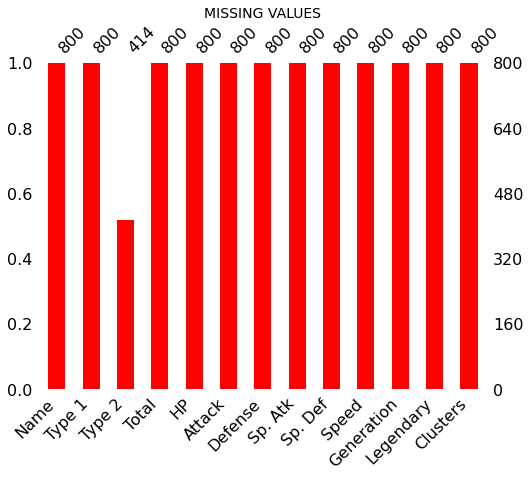

In [8]:
import missingno as msno
msno.bar(df_full,(8,6),color='red')
plt.title('MISSING VALUES',fontsize=14)

Okay Type-2 has all the missing values we will deal with this later

In [9]:
df_full['Legendary_map'] = df_full["Legendary"].astype(int)
df = df_full.copy()
df.drop(columns = ['Type 2'], axis=1, inplace=True)

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           800 non-null    object
 1   Type 1         800 non-null    object
 2   Type 2         414 non-null    object
 3   Total          800 non-null    int64 
 4   HP             800 non-null    int64 
 5   Attack         800 non-null    int64 
 6   Defense        800 non-null    int64 
 7   Sp. Atk        800 non-null    int64 
 8   Sp. Def        800 non-null    int64 
 9   Speed          800 non-null    int64 
 10  Generation     800 non-null    int64 
 11  Legendary      800 non-null    bool  
 12  Clusters       800 non-null    int64 
 13  Legendary_map  800 non-null    int32 
dtypes: bool(1), int32(1), int64(9), object(3)
memory usage: 79.0+ KB


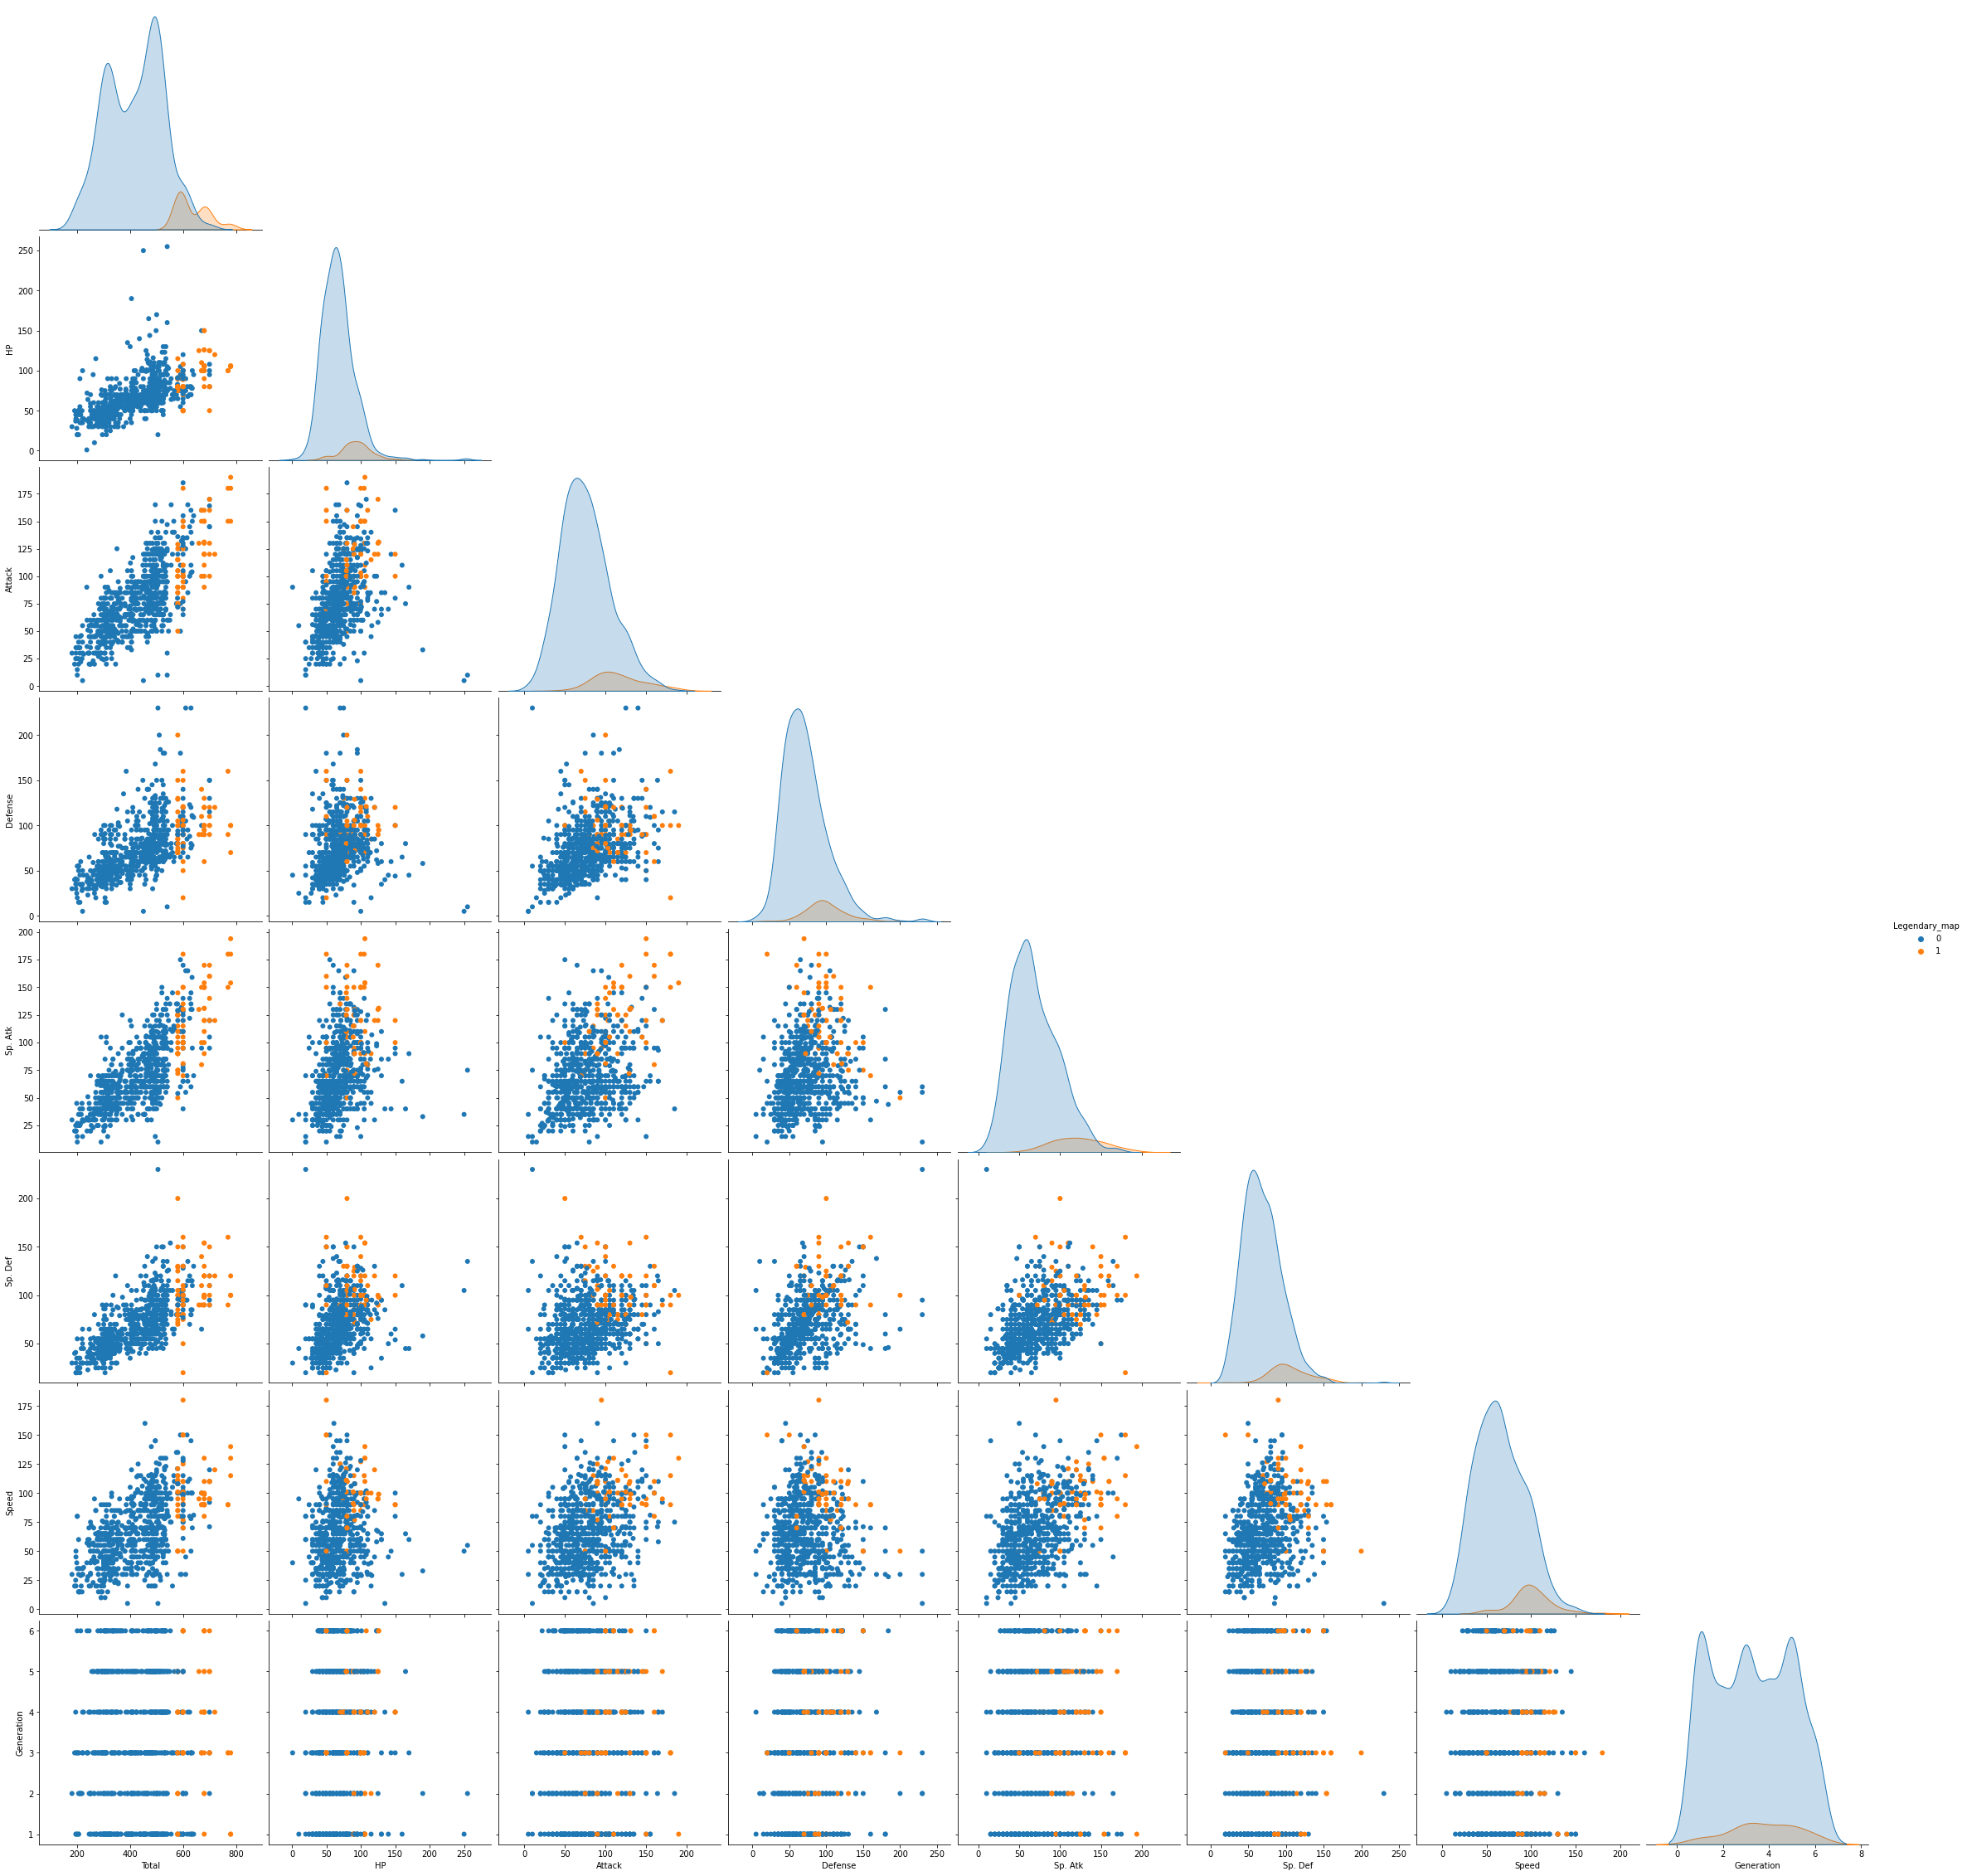

In [11]:
cols = [ 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
sns.pairplot(df,hue='Legendary_map',vars=cols,corner=True,plot_kws=dict(linewidth=0, alpha=1),height=4)

We can see a few linear correlations. We will dwelve deeper into individual columns later. Also we can see that Legendary Pokemons have everything on the upper end which proves why they are Legendary.

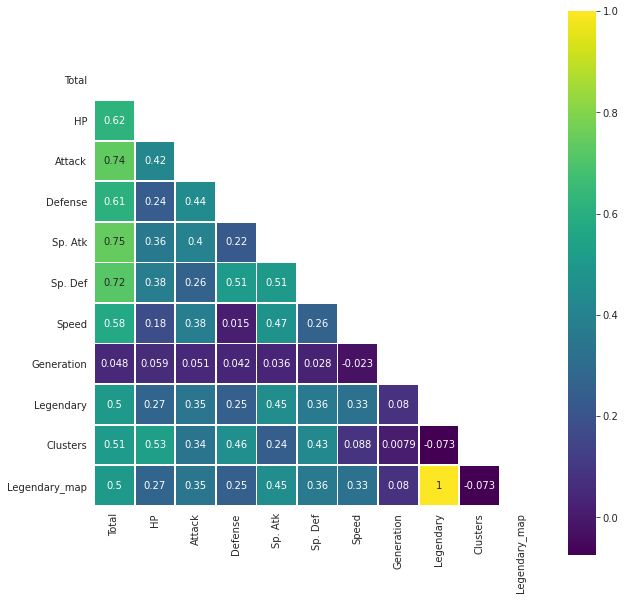

In [12]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="viridis",annot=True)


OBSERVATIONS :

    Attack, Special Attack, Special Defence have high correlation on Total Rating of the Pokemon..
    Speed and Defence do not have any correlation but speed has good correlation with Special Defence


<AxesSubplot:xlabel='Type 1', ylabel='count'>

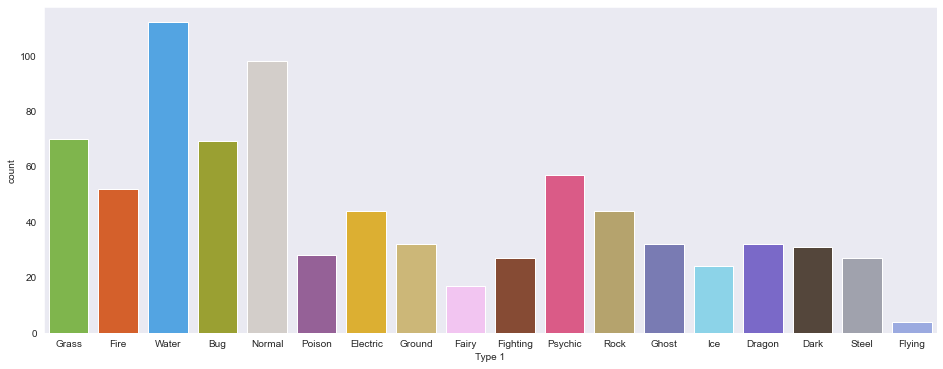

In [13]:
sns.set_style('dark')
plt.figure(figsize=(16,6))
sns.countplot(df_full['Type 1'],
             palette=['#7ec63c','#f0560f','#3ba7fa','#aab31f','#d5cec8','#9e58a0','#f8bc16','#dabe6a','#f9bef8','#944526','#ef4681','#c1a961','#6f72bd','#7ddbf7','#7059d8','#584537','#9ea0af','#8fa3ec'])


In the above figure we can see Water and Normal Pokemon types are in high number.

FUN FACT: Pokemon types are represented with the same color as they are represented above.


<AxesSubplot:xlabel='Type 1', ylabel='count'>

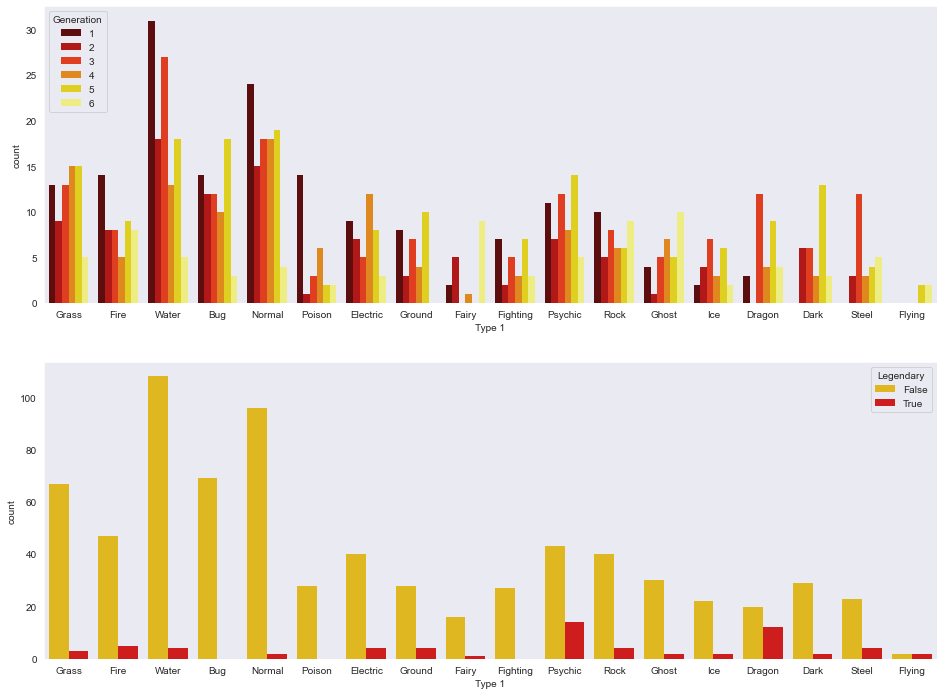

In [14]:
sns.set_style('dark')
plt.figure(figsize=(16,12))
plt.subplot(211)
sns.countplot(df_full['Type 1'], hue=df_full['Generation'],palette='hot',linewidth=0,alpha=1)
plt.subplot(212)
sns.countplot(df_full['Type 1'], hue= df_full['Legendary'], palette='hot_r', linewidth=0, alpha=1)


    I know the above plot looks somewhat like Germany Flag. However,lot of Gen-1 pokemons in first 5 types and then other Gen pokemons are higher at the near end.
    Also most of the legendary pokemons are psychic or dragon type.


Total column as there are few missing values in Type-2 which we will deal with later

Text(0.5, 1.0, 'Distribution of Total')

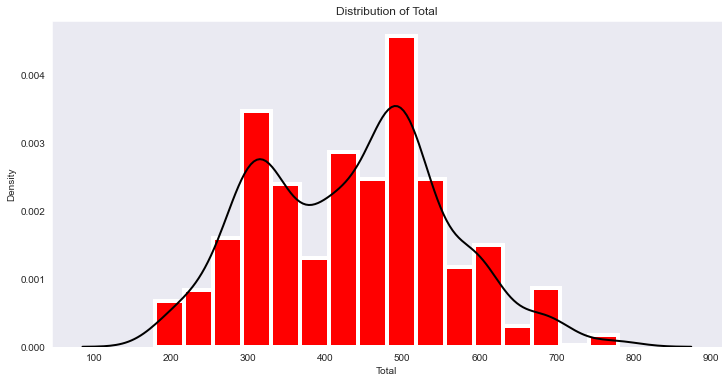

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(df_full['Total'],color='red',hist_kws={'alpha':1,"linewidth": 4}, kde_kws={"color": "black", "lw": 2, "label": "KDE"})
plt.title('Distribution of Total', fontdict = {'size': 12})
# plt.xlabel('Percentage of correct answers', size = 12)

We can see a spike near 300 and 500

In [16]:
print(f"{y_}The Pokemons with highest TOTAL are \n{r_}{df.loc[df['Total'] == df_full['Total'].max()]['Name']}")

The Pokemons with highest TOTAL are 
163      MewtwoMega Mewtwo X
164      MewtwoMega Mewtwo Y
426    RayquazaMega Rayquaza
Name: Name, dtype: object


In [17]:
print(f"{y_}The Pokemon with lowest TOTAL is \n{b_}{df.loc[df['Total'] == df_full['Total'].min()]['Name']}")

The Pokemon with lowest TOTAL is 
206    Sunkern
Name: Name, dtype: object


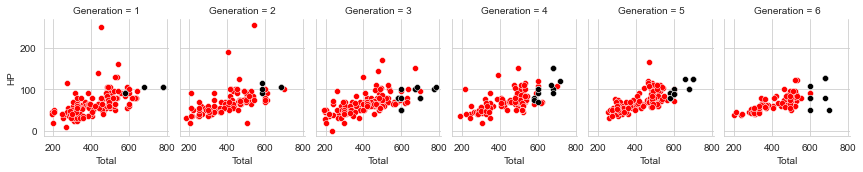

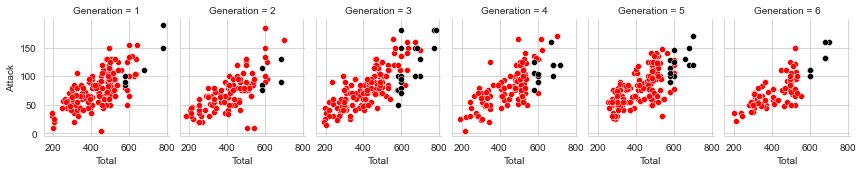

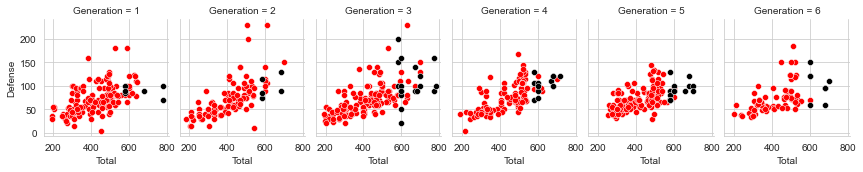

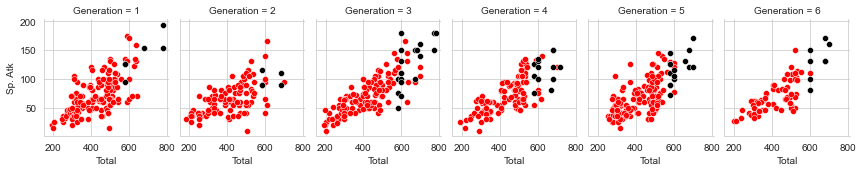

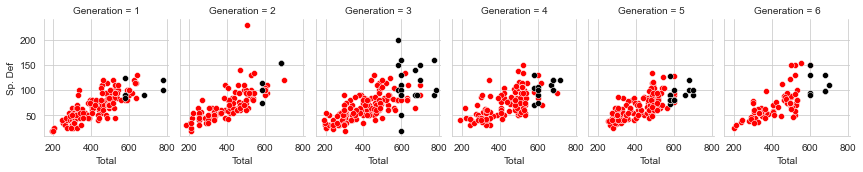

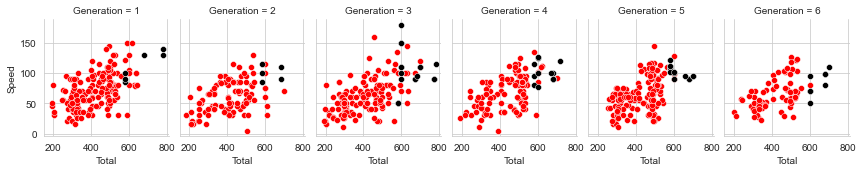

In [18]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for i,c in enumerate(cols): 

    sns.set_style('whitegrid')
    g = sns.FacetGrid(df_full, col="Generation", hue='Legendary_map', height=2.5, aspect=0.8,palette=['red','black'])
    g.set_axis_labels("Total", c)
    g.map(sns.scatterplot, 'Total', c)


We have so many plots and we can infer a lot of things from it.

    Most of the legendary pokemons (black points) are on the right side and around top for each plot which shows why they are legendary
    As we move over generations the plots look more organized for each column.



In [19]:
print(f"{y_}The Pokemon with highest HP is \n{b_}{df.loc[df['HP'] == df_full['HP'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest HP is \n{b_}{df.loc[df['HP'] == df_full['HP'].min()]['Name']}")

The Pokemon with highest HP is 
261    Blissey
Name: Name, dtype: object

The Pokemon with lowest HP is 
316    Shedinja
Name: Name, dtype: object


In [20]:
#from io import BytesIO

#f = urllib.request.urlopen("https://pokestop.io/img/pokemon/blissey-256x256.png")
#f1 = urllib.request.urlopen("https://img.rankedboost.com/wp-content/plugins/pokemon-sword-shield/assets/pokemon-images-regular/Shedinja.png")
#img = mpimg.imread(f)
#img1 = mpimg.imread(f1)

#plt.figure(figsize=(10,10))
#plt.subplot(121)
#imgplot = plt.imshow(img)
#plt.title('Highest HP')
#plt.axis('off')


#plt.subplot(122)
#imgplot1 = plt.imshow(img1)
#plt.axis('off')
#plt.title('Lowest HP')

#plt.show()

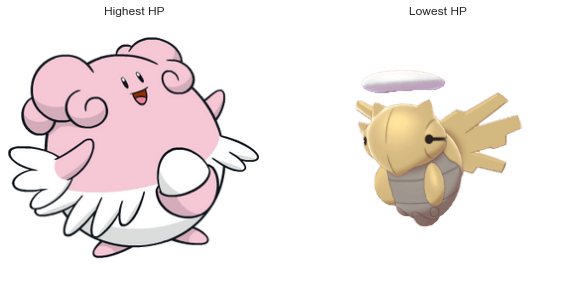

In [21]:
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO

f = urllib.request.urlopen("https://pokestop.io/img/pokemon/blissey-256x256.png")
img_file = BytesIO(f.read())
img = mpimg.imread(img_file)

f1 = urllib.request.urlopen("https://img.rankedboost.com/wp-content/plugins/pokemon-sword-shield/assets/pokemon-images-regular/Shedinja.png")
img_file1 = BytesIO(f1.read())
img1 = mpimg.imread(img_file1)

plt.figure(figsize=(10,10))
plt.subplot(121)
imgplot = plt.imshow(img)
plt.title('Highest HP')
plt.axis('off')


plt.subplot(122)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Lowest HP')

plt.show()


In [22]:
print(f"{y_}The Pokemon with highest Attack is \n{b_}{df.loc[df['Attack'] == df_full['Attack'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest Attack is \n{b_}{df.loc[df['Attack'] == df_full['Attack'].min()]['Name']}")

The Pokemon with highest Attack is 
163    MewtwoMega Mewtwo X
Name: Name, dtype: object

The Pokemon with lowest Attack is 
121    Chansey
488    Happiny
Name: Name, dtype: object


In [23]:
#f = urllib.request.urlopen("https://in.portal-pokemon.com/play/resources/pokedex/img/pm/dc96945bf5cb7f776f0272bf17ebf0d4593a5849.png")
#f1 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/113.png")
#f2 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/440.png")

#img = mpimg.imread(f)
#img1 = mpimg.imread(f1)
#img2 = mpimg.imread(f2)

#plt.figure(figsize=(15,15))
#plt.subplot(131)
#imgplot = plt.imshow(img)
#plt.title('Highest Attack')
#plt.axis('off')


#plt.subplot(132)
#imgplot1 = plt.imshow(img1)
#plt.axis('off')
#plt.title('Lowest Attack')

#plt.subplot(133)
#imgplot1 = plt.imshow(img2)
#plt.axis('off')
#plt.title('Lowest Attack')

#plt.show()

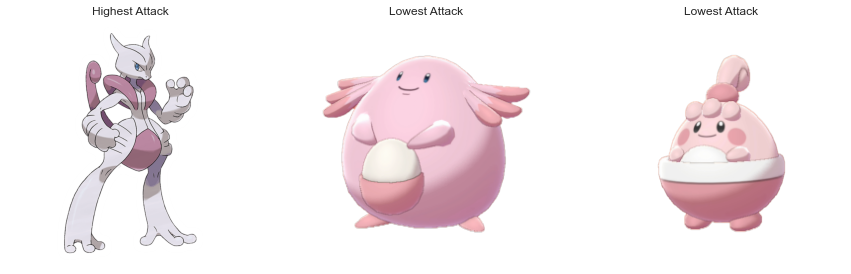

In [24]:
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO

f = urllib.request.urlopen("https://in.portal-pokemon.com/play/resources/pokedex/img/pm/dc96945bf5cb7f776f0272bf17ebf0d4593a5849.png")
img_file = BytesIO(f.read())
img = mpimg.imread(img_file)

f1 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/113.png")
img_file1 = BytesIO(f1.read())
img1 = mpimg.imread(img_file1)

f2 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/440.png")
img_file2 = BytesIO(f2.read())
img2 = mpimg.imread(img_file2)

plt.figure(figsize=(15,15))
plt.subplot(131)
imgplot = plt.imshow(img)
plt.title('Highest Attack')
plt.axis('off')


plt.subplot(132)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Lowest Attack')

plt.subplot(133)
imgplot2 = plt.imshow(img2)
plt.axis('off')
plt.title('Lowest Attack')

plt.show()


In [25]:
print(f"{y_}The Pokemon with highest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].min()]['Name']}")

The Pokemon with highest Defense is 
224    SteelixMega Steelix
230                Shuckle
333      AggronMega Aggron
Name: Name, dtype: object

The Pokemon with lowest Defense is 
121    Chansey
488    Happiny
Name: Name, dtype: object


Both Chansey and Happiny have least defense so we will not see them again

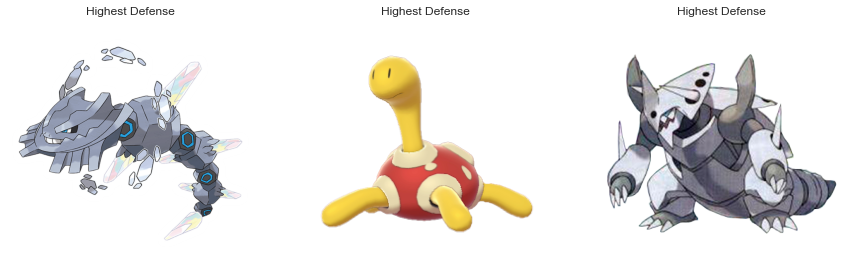

In [26]:
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO

f = urllib.request.urlopen("https://sg.portal-pokemon.com/play/resources/pokedex/img/pm/f6e89e59cf6c2de593179ff7c2825403fdd494e7.png")
img_file = BytesIO(f.read())
img = mpimg.imread(img_file)

f1 = urllib.request.urlopen("https://www.serebii.net/swordshield/pokemon/213.png")
img_file1 = BytesIO(f1.read())
img1 = mpimg.imread(img_file1)

f2 = urllib.request.urlopen("https://i.pinimg.com/originals/a6/72/1e/a6721e086b20846b79050bff722a56c5.png")
img_file2 = BytesIO(f2.read())
img2 = mpimg.imread(img_file2)


#img = mpimg.imread(f)
#img1 = mpimg.imread(f1)
#img2 = mpimg.imread(f2)


plt.figure(figsize=(15,15))
plt.subplot(131)
imgplot = plt.imshow(img)
plt.title('Highest Defense')
plt.axis('off')


plt.subplot(132)
imgplot1 = plt.imshow(img1)
plt.axis('off')
plt.title('Highest Defense')

plt.subplot(133)
imgplot1 = plt.imshow(img2)
plt.axis('off')
plt.title('Highest Defense')

plt.show()

In [27]:
print(f"{y_}The Pokemon with highest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].max()]['Name']}")
print(f"\n{y_}The Pokemon with lowest Defense is \n{b_}{df.loc[df['Defense'] == df_full['Defense'].min()]['Name']}")

The Pokemon with highest Defense is 
224    SteelixMega Steelix
230                Shuckle
333      AggronMega Aggron
Name: Name, dtype: object

The Pokemon with lowest Defense is 
121    Chansey
488    Happiny
Name: Name, dtype: object
